In [12]:
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load the data from Excel
data = pd.read_excel(r"C:\maruf_files\jupyter_notebook\class_1dcnn\samples.xlsx")

# Extract features (bands) and labels
X = data[['B1', 'B2', 'B3', 'B4', 'B5']].values
y = data['LandCover'].values


In [13]:
# Feature scaling: Min Max Scaler method
# Import the module
from sklearn.preprocessing import MinMaxScaler

# Define the scaling object
scaler = MinMaxScaler()

# Fit the scaler to X
scaler.fit(X)

#  Transform the original X to scaled/normalized X
X = scaler.transform(X)
print(X)


[[0.45524297 0.46094022 0.48700089 0.66651257 0.73157072]
 [0.43682864 0.45304701 0.46019276 0.62213388 0.70903881]
 [0.4514919  0.47278003 0.50328015 0.64534024 0.72362594]
 ...
 [0.20375107 0.19373186 0.20871467 0.3100037  0.45363376]
 [0.19778346 0.19442832 0.19802381 0.3002034  0.43826517]
 [0.20767263 0.19315148 0.19680894 0.30159024 0.42875749]]


In [14]:
# Encode categorical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Reshape data for CNN input (assuming each sample has 5 bands)
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)


In [16]:
# Define the CNN model
model = Sequential()
#model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 3, 64)             256       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                      

In [17]:
# Specify 1DCNN model parameters
from tensorflow.keras.optimizers import Adam, SGD

# change this following parameters to see how the results change
batch_size = 32
learn_rate = 0.01
opt = Adam(lr = learn_rate)
epochs = 20

# Model Compile
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the model
history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.20, verbose=1)

Epoch 1/20
375/375 [==============================] - 3s 4ms/step - loss: 0.5811 - accuracy: 0.6745 - val_loss: 0.5116 - val_accuracy: 0.7017
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.4953 - accuracy: 0.7211 - val_loss: 0.4766 - val_accuracy: 0.7592
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.4710 - accuracy: 0.7647 - val_loss: 0.4330 - val_accuracy: 0.7906
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.4412 - accuracy: 0.7914 - val_loss: 0.4197 - val_accuracy: 0.7909
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.4182 - accuracy: 0.8068 - val_loss: 0.4015 - val_accuracy: 0.8059
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.4083 - accuracy: 0.8136 - val_loss: 0.4007 - val_accuracy: 0.8076
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3943 - accuracy: 0.8206 - val_loss: 0.3807 - val_accuracy: 0.8216
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


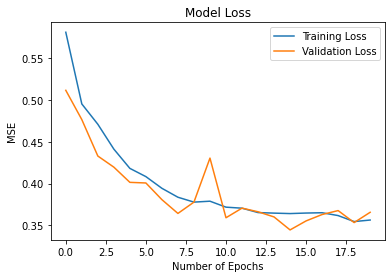

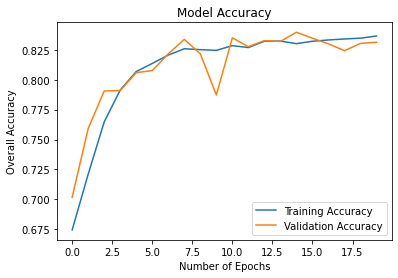

In [18]:
# List all data in history
print(history.history.keys())

# Visulize the traning Loss acorss different epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('MSE')
plt.xlabel('Number of Epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

# Visulize the training Accuracy acorss different epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Overall Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['Training Accuracy','Validation Accuracy'], loc = 'lower right')
plt.show()

468/468 [==============================] - 1s 2ms/step
Model Training accuracy:  0.8365
Model Training kappa:  0.7534
Model Training f-score:  0.8363
[[4468   27  766]
 [   0 4991  297]
 [  62 1296 3061]]


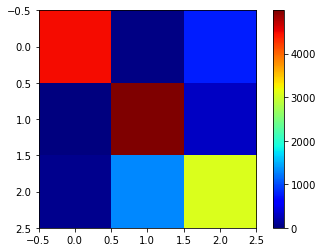

In [19]:
# Evaluate the performance of the model at the Training accuracy
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,classification_report,confusion_matrix
predictions = model.predict(X_train)
y_pred_train = np.argmax(predictions, axis=1)

print('Model Training accuracy: % .4f' % accuracy_score(y_train, y_pred_train))
print('Model Training kappa: % .4f' % cohen_kappa_score(y_train, y_pred_train))
print('Model Training f-score: % .4f' % f1_score(y_train, y_pred_train, average = 'weighted'))

cm_testing = confusion_matrix(y_train, y_pred_train)
print(cm_testing)
plt.imshow(cm_testing,cmap = 'jet')
plt.colorbar()
plt.show()


201/201 [==============================] - 0s 2ms/step
Model Testing accuracy:  0.8371
Model Testing kappa:  0.7534
Model Testing f-score:  0.8370
[[1885    9  318]
 [   1 2221  140]
 [  15  562 1265]]


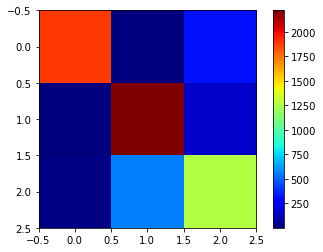

In [20]:
# Evaluate the performance of the model at the Testing accuracy
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,classification_report,confusion_matrix
predictions = model.predict(X_test)
y_pred_test = np.argmax(predictions, axis=1)

print('Model Testing accuracy: % .4f' % accuracy_score(y_test, y_pred_test))
print('Model Testing kappa: % .4f' % cohen_kappa_score(y_test, y_pred_test))
print('Model Testing f-score: % .4f' % f1_score(y_test, y_pred_test, average = 'weighted'))

cm_testing = confusion_matrix(y_test, y_pred_test)
print(cm_testing)
plt.imshow(cm_testing,cmap = 'jet')
plt.colorbar()
plt.show()